# VEHICLE INSURANCE CLAIM FRAUD DETECTION USING CLASSIFICATION

<a name="1"></a>
### INTRODUCTION
$\textbf{INSURANCE FRAUD}$ has accompanied insurance since its inception, but the
manner in which these practices and their methods of operation have
evolved over time, and the volume and frequency of insurance fraud
incidents have recently increased. Vehicle insurance fraud involves
conspiring to make false or exaggerated claims involving property
damage or personal injuries following an accident. Some common
examples include staged accidents where fraudsters deliberately
“arrange” for accidents to occur; the use of phantom passengers, where
people who were not even at the scene of the accident claim to have
suffered grievous injury, and making false personal injury claims where
personal injuries are grossly exaggerated.

<a name="2"></a>
### OBJECTIVE
Our $\textbf{OBJECTIVE}$ of this project is focusing on detecting vehicle fraud
by using machine learning algorithms, and also the final analysis and
conclusion based on performance of the different $\textbf{CLASSIFICATION
ALGORITHMS}$ like $\textbf{LINEAR DISCRIMINANT ANALYSIS}$, $\textbf{RANDOM FOREST}$,
$\textbf{DECISION TREE}$ and $\textbf{K-NEAREST NEIGHBOUR(KNN)}$ in terms of greater accuracy
in predicting the fraud.

In [229]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import io
import matplotlib.pyplot as plt
%matplotlib inline
import time
import scipy.stats as stats
# import packages for hyperparameters tuning
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [210]:
#iMPORT DATASET
df=pd.read_csv("Car_Insurance_Claim_Fraud_Detection_Dataset.csv")
df=df.drop(["Month",'DayOfWeek',"DayOfWeekClaimed",'Make','MonthClaimed',"PolicyNumber",'RepNumber'],axis=1)
df.head()

,WeekOfMonth,AccidentArea,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,5,Urban,1,Female,Single,21.0,Policy Holder,Sport - Liability,Sport,more than 69000,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069420
1,3,Urban,4,Male,Single,34.0,Policy Holder,Sport - Collision,Sport,more than 69000,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.455570
2,5,Urban,2,Male,Married,47.0,Policy Holder,Sport - Collision,Sport,more than 69000,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941320
3,2,Rural,1,Male,Married,65.0,Third Party,Sedan - Liability,Sport,20000 to 29000,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153493
4,1,Urban,3,Male,Married,36.0,Third Party,Sport - Collision,Sport,more than 69000,...,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374340


<a name="1"></a>
### DATA DESCRIPTION
In our data There are 27 variables, The variables are,

In [211]:
df.columns

Index(['WeekOfMonth', 'AccidentArea', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'Deductible', 'DriverRating',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy',
       'ClaimSize'],
      dtype='object')

<a name="1"></a>
Here, we have total $\textbf{11565}$ $\textbf{DATA POINTS}$, $\textbf{26}$ $\textbf{EXPLANATORY}$ variables and $\textbf{1}$
$\textbf{RESPONSE}$ variables. Here $\textbf{FRAUD FOUND_P}$ is consider as $\textbf{RESPONSE}$
variable.$\\$
Out of $\textbf{26}$ $\textbf{EXPLANATORY}$  variables, we have $\textbf{2}$ $\textbf{NUMERIC}$ variables namely
$\textbf{“AGE”}$ and $\textbf{"CLAIM SIZE"}$ and rest $\textbf{24}$’s are $\textbf{CATEGORICAL}$ variables.

## DATA CLEANING

### 1)CHECKING FOR MISSING VALUES
Before carrying out any further analysis of our dataset, we want to check if our dataset
contains any missing values or not.

In [212]:
df.isna().sum()

WeekOfMonth             0
AccidentArea            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     5
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
Deductible              0
DriverRating            6
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
ClaimSize               0
dtype: int64

So, our dataset contains $\textbf{5}$ missing values for the column $\textbf{“AGE”}$ and $\textbf{6}$ missing values for the
column $\textbf{“DRIVERRATING”}$.
We found out that, there are total $\textbf{11}$ $\textbf{ROWS}$ for which we have a missing value. This qualnity is very small respect to our whole dataset. $\\$ So,
We $\textbf{DROP}$ those rows from our dataset consisting of 11565 rows, and finally obtain a dataset
with $\textbf{11554}$ rows containing no missing values.

In [213]:
#Dropping Missing values 
df=df.dropna()
df.isna().sum()

WeekOfMonth             0
AccidentArea            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
ClaimSize               0
dtype: int64

So, now our data is $\textbf{FREE}$ from $\textbf{MISSING}$ values.

### 2)DUPLICATE VALUE CHECK

In [214]:
print(len(df.drop_duplicates())==len(df))

True


Since, the length of the dataset after dropping the $\textbf{DUPLICATES}$ is $\textbf{SAME}$ as the length of the
original dataset, so we can conclude that our dataset does $\textbf{NOT}$ contain any duplicate values.

So, now our data is $\textbf{CLEAN}$ & ready for furthur analysis.

## DIMENSION OF DATASET

In [215]:
#Dimension of our data
df.shape

(11554, 27)

## DATA TYPES

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11554 entries, 0 to 11564
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   WeekOfMonth           11554 non-null  int64  
 1   AccidentArea          11554 non-null  object 
 2   WeekOfMonthClaimed    11554 non-null  int64  
 3   Sex                   11554 non-null  object 
 4   MaritalStatus         11554 non-null  object 
 5   Age                   11554 non-null  float64
 6   Fault                 11554 non-null  object 
 7   PolicyType            11554 non-null  object 
 8   VehicleCategory       11554 non-null  object 
 9   VehiclePrice          11554 non-null  object 
 10  FraudFound_P          11554 non-null  int64  
 11  Deductible            11554 non-null  int64  
 12  DriverRating          11554 non-null  float64
 13  Days_Policy_Accident  11554 non-null  object 
 14  Days_Policy_Claim     11554 non-null  object 
 15  PastNumberOfClaims 

## CATEGORICAL COLUMNS

In [217]:
cat_cols = [col for col in df.columns if col not in df.describe().columns]
cat_cols

['AccidentArea',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'BasePolicy']

In [218]:
df["FraudFound_P"].value_counts()

0    10869
1      685
Name: FraudFound_P, dtype: int64

## EDA

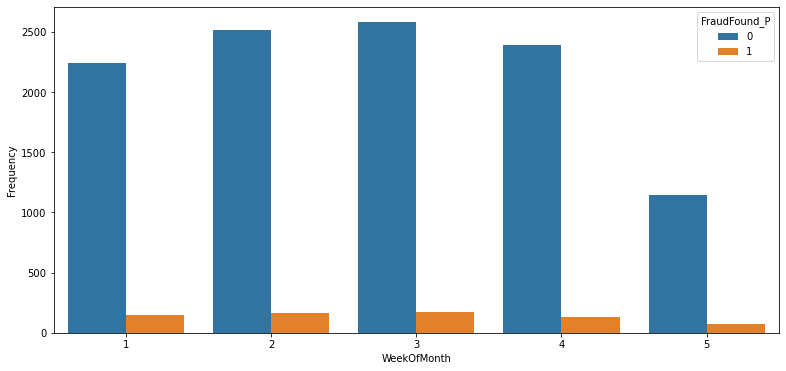

In [169]:
plt.figure(figsize = (13,6))
sns.countplot( x= df['WeekOfMonth'], hue = 'FraudFound_P', data = df)
plt.xlabel('WeekOfMonth')
plt.ylabel('Frequency')
plt.show()

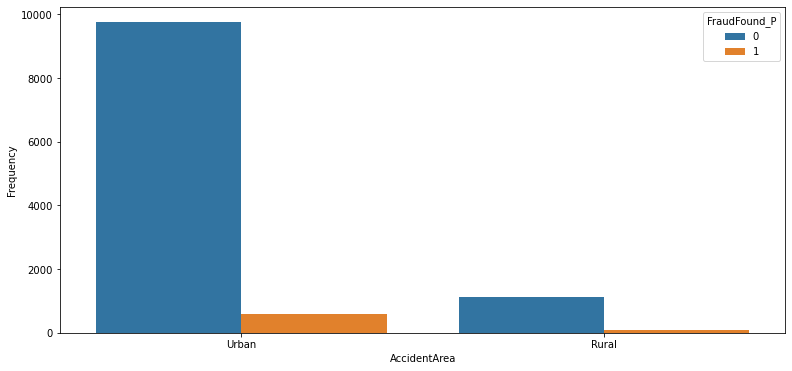

In [146]:
plt.figure(figsize = (13,6))
sns.countplot( x= df['AccidentArea'], hue = 'FraudFound_P', data = df)
plt.xlabel('AccidentArea')
plt.ylabel('Frequency')
plt.show()

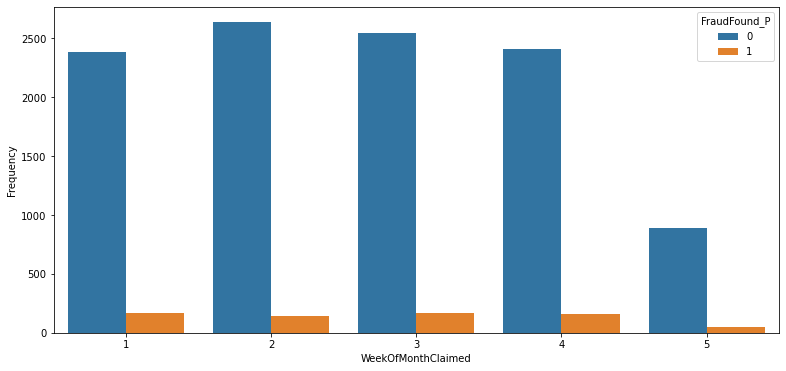

In [147]:
plt.figure(figsize = (13,6))
sns.countplot( x= df['WeekOfMonthClaimed'], hue = 'FraudFound_P', data = df)
plt.xlabel('WeekOfMonthClaimed')
plt.ylabel('Frequency')
plt.show()

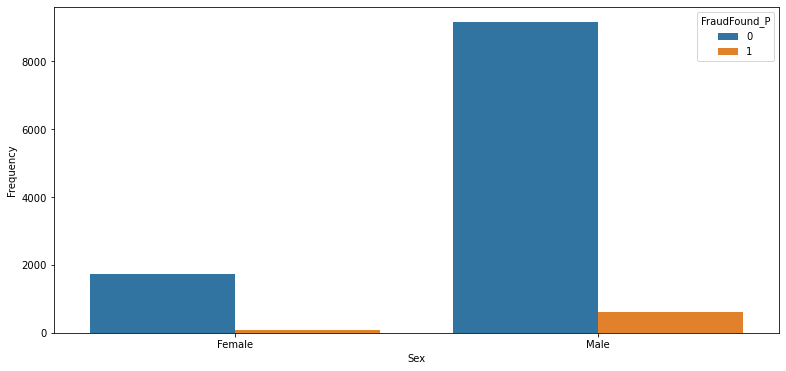

In [90]:
plt.figure(figsize = (13,6))
sns.countplot( x= df['Sex'], hue = 'FraudFound_P', data = df)
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

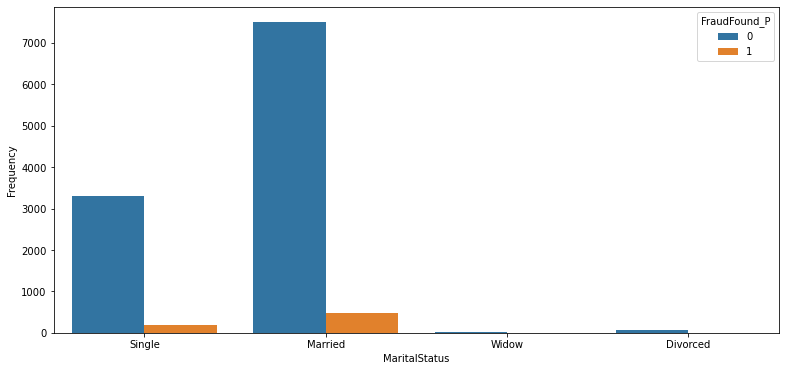

In [91]:
plt.figure(figsize = (13,6))
sns.countplot( x= df_1['MaritalStatus'], hue = 'FraudFound_P', data = df_1)
plt.xlabel('MaritalStatus')
plt.ylabel('Frequency')
plt.show()

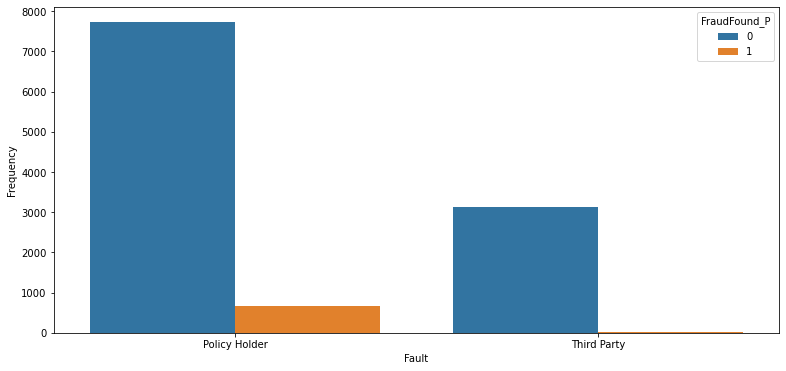

In [97]:
plt.figure(figsize = (13,6))
sns.countplot( x= df['Fault'], hue = 'FraudFound_P', data = df)
plt.xlabel('Fault')
plt.ylabel('Frequency')
plt.show()

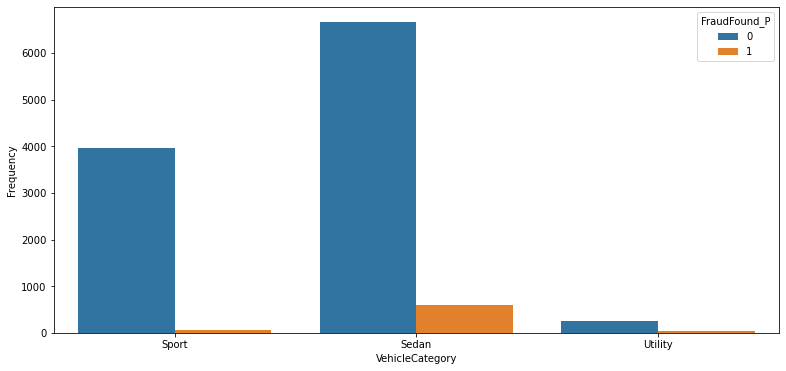

In [103]:
plt.figure(figsize = (13,6))
sns.countplot( x= df['VehicleCategory'], hue = 'FraudFound_P', data = df)
plt.xlabel('VehicleCategory')
plt.ylabel('Frequency')
plt.show()

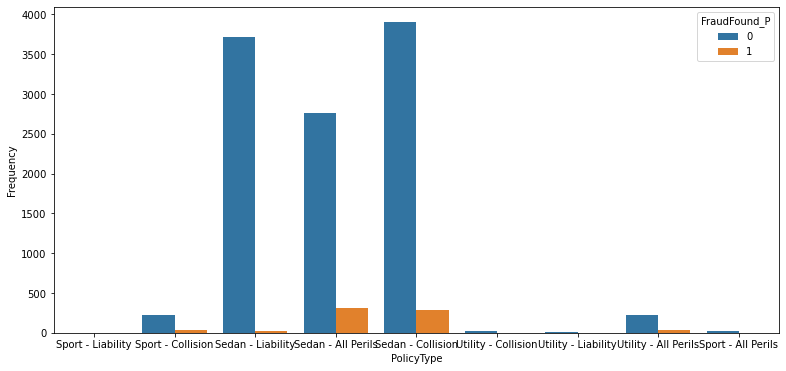

In [100]:
plt.figure(figsize = (13,6))
sns.countplot( x= df['PolicyType'], hue = 'FraudFound_P', data = df)
plt.xlabel('PolicyType')
plt.ylabel('Frequency')
plt.show()

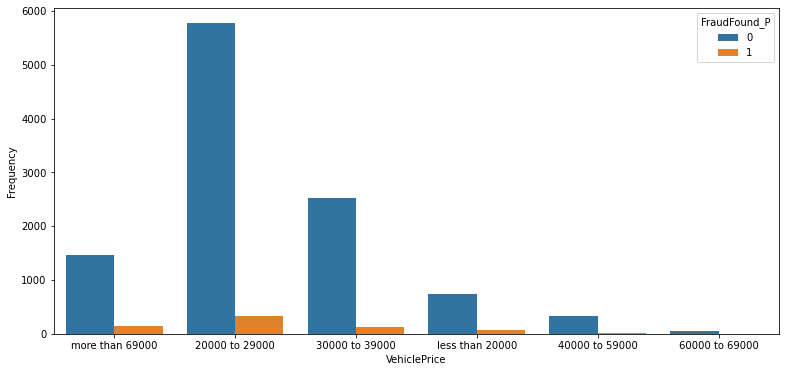

In [34]:
plt.figure(figsize = (13,6))
sns.countplot( x= df['VehiclePrice'], hue = 'FraudFound_P', data = df)
plt.xlabel('VehiclePrice')
plt.ylabel('Frequency')
plt.show()

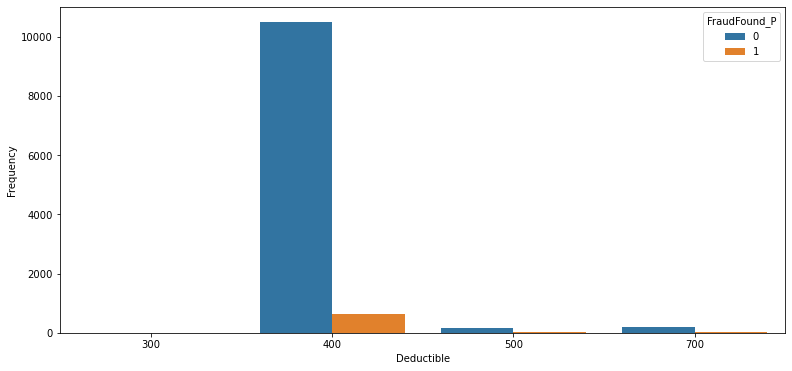

In [35]:
plt.figure(figsize = (13,6))
sns.countplot( x= df['Deductible'], hue = 'FraudFound_P', data = df)
plt.xlabel('Deductible')
plt.ylabel('Frequency')
plt.show()

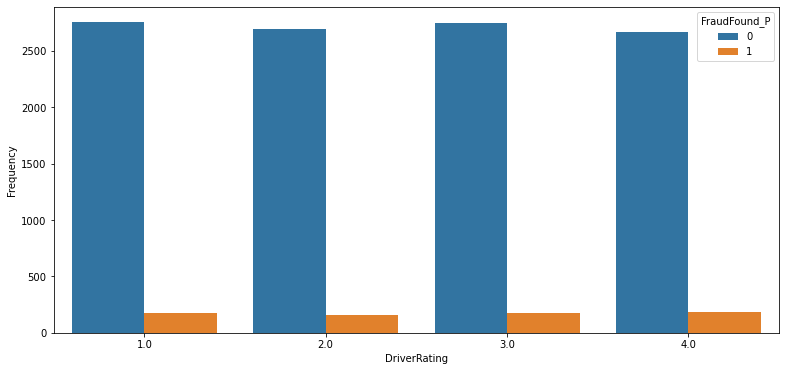

In [36]:
plt.figure(figsize = (13,6)
sns.countplot( x= df['DriverRating'], hue = 'FraudFound_P', data = df)
plt.xlabel('DriverRating')
plt.ylabel('Frequency')
plt.show()

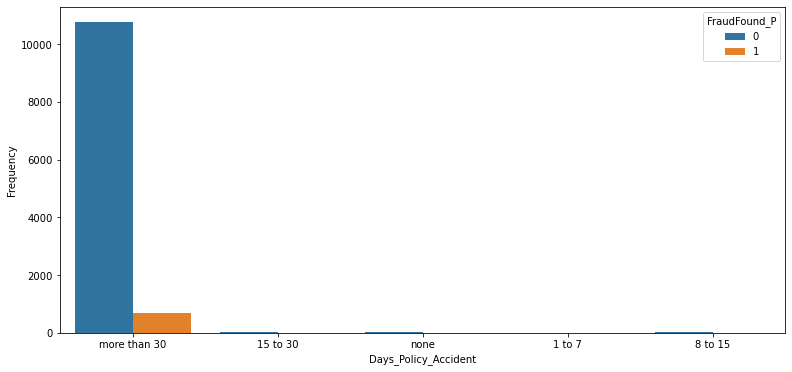

In [37]:
plt.figure(figsize = (13,6))
sns.countplot( x= df['Days_Policy_Accident'], hue = 'FraudFound_P', data = df)
plt.xlabel('Days_Policy_Accident')
plt.ylabel('Frequency')
plt.show()

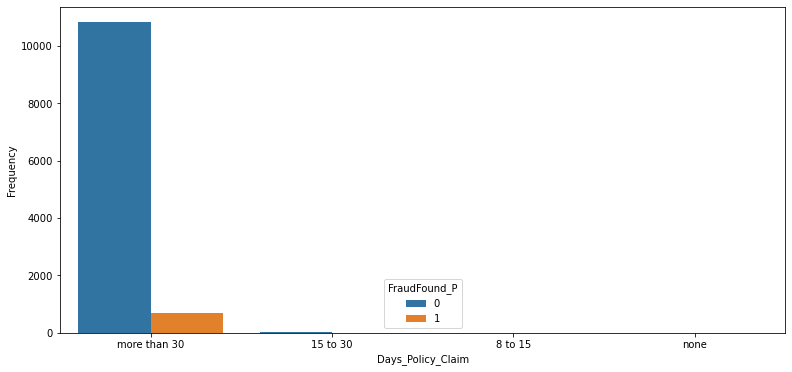

In [38]:
plt.figure(figsize = (13,6))
sns.countplot( x= df['Days_Policy_Claim'], hue = 'FraudFound_P', data = df)
plt.xlabel('Days_Policy_Claim')
plt.ylabel('Frequency')
plt.show()

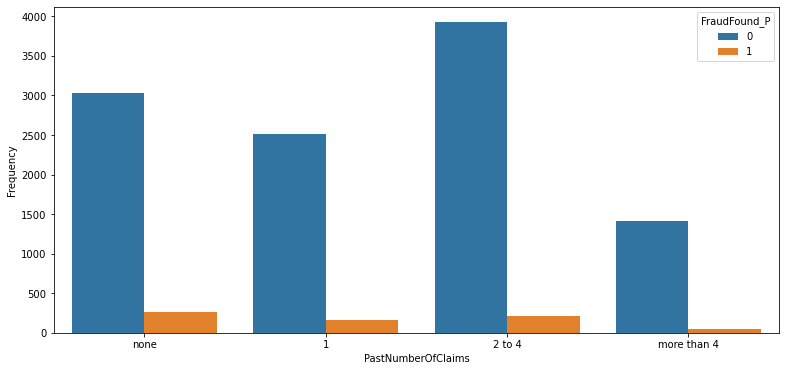

In [39]:
plt.figure(figsize = (13,6))
sns.countplot( x= df['PastNumberOfClaims'], hue = 'FraudFound_P', data = df)
plt.xlabel('PastNumberOfClaims')
plt.ylabel('Frequency')
plt.show()

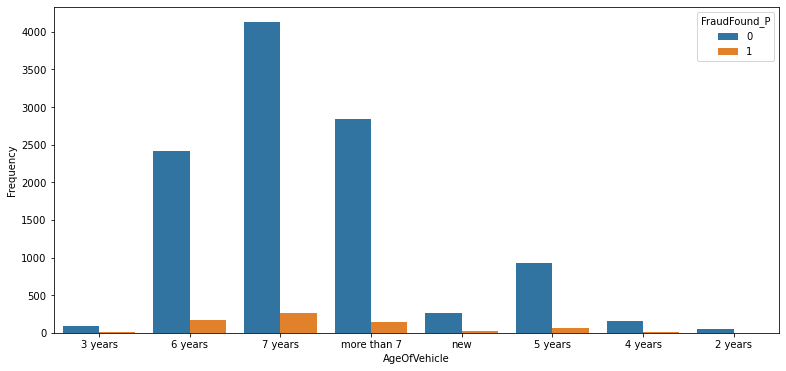

In [106]:
plt.figure(figsize = (13,6))
sns.countplot( x= df['AgeOfVehicle'], hue = 'FraudFound_P', data = df)
plt.xlabel('AgeOfVehicle')
plt.ylabel('Frequency')
plt.show()

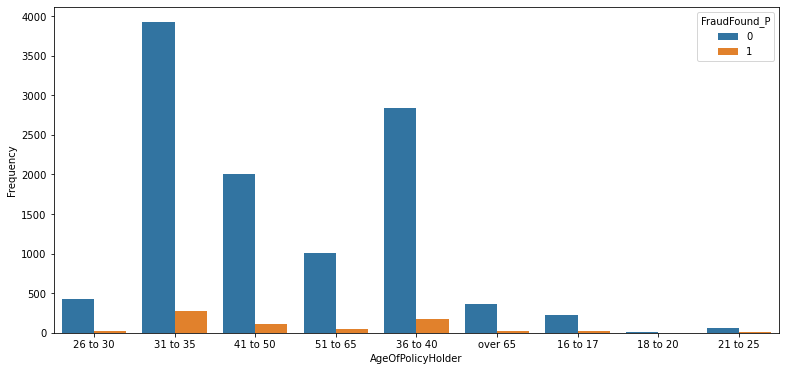

In [105]:
plt.figure(figsize = (13,6))
sns.countplot( x= df['AgeOfPolicyHolder'], hue = 'FraudFound_P', data = df)
plt.xlabel('AgeOfPolicyHolder')
plt.ylabel('Frequency')
plt.show()

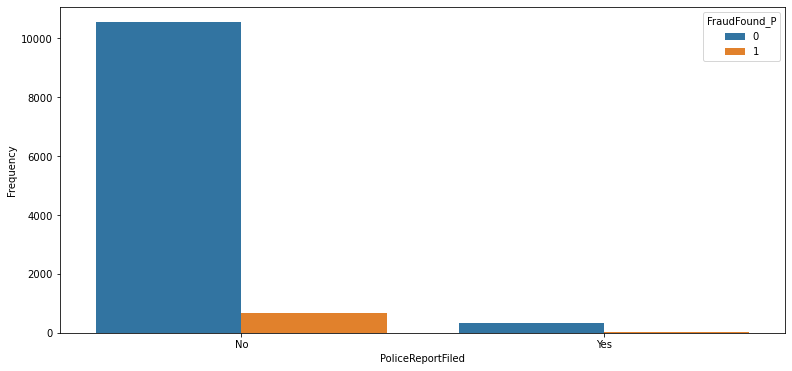

In [104]:
plt.figure(figsize = (13,6))
sns.countplot( x= df['PoliceReportFiled'], hue = 'FraudFound_P', data = df)
plt.xlabel('PoliceReportFiled')
plt.ylabel('Frequency')
plt.show()

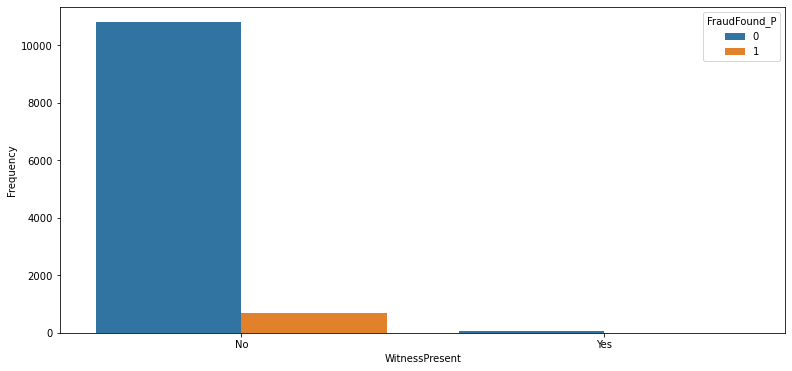

In [107]:
plt.figure(figsize = (13,6))
sns.countplot( x= df['WitnessPresent'], hue = 'FraudFound_P', data = df)
plt.xlabel('WitnessPresent')
plt.ylabel('Frequency')
plt.show()

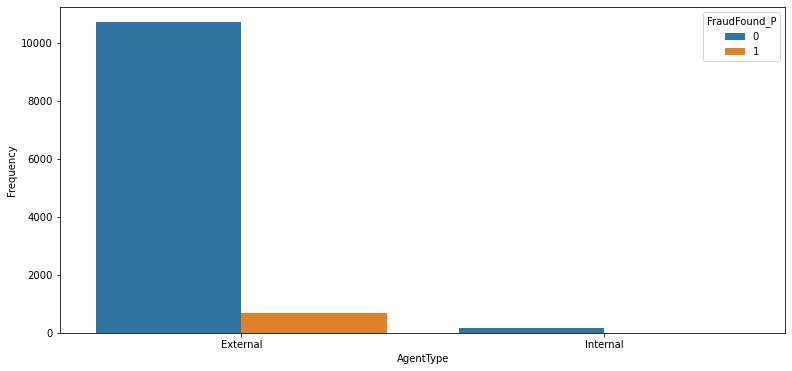

In [108]:
plt.figure(figsize = (13,6))
sns.countplot( x= df['AgentType'], hue = 'FraudFound_P', data = df)
plt.xlabel('AgentType')
plt.ylabel('Frequency')
plt.show()

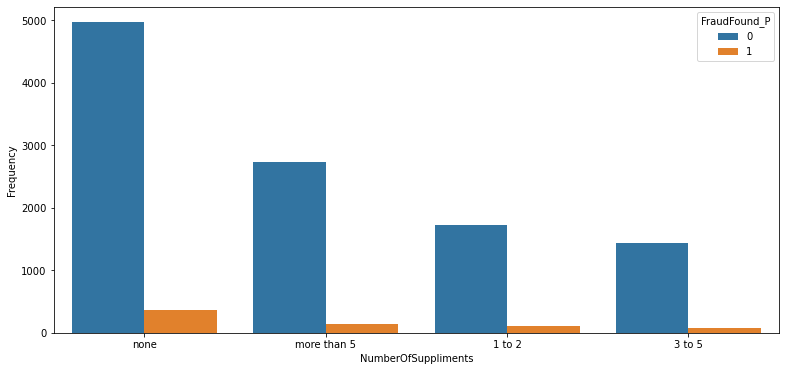

In [109]:
plt.figure(figsize = (13,6))
sns.countplot( x= df['NumberOfSuppliments'], hue = 'FraudFound_P', data = df)
plt.xlabel('NumberOfSuppliments')
plt.ylabel('Frequency')
plt.show()

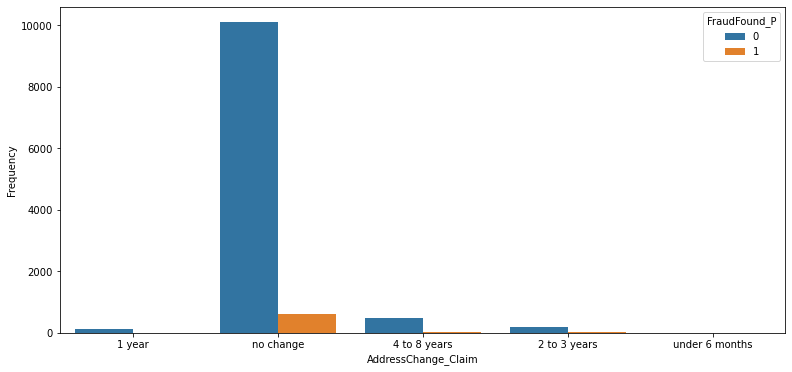

In [110]:
plt.figure(figsize = (13,6))
sns.countplot( x= df['AddressChange_Claim'], hue = 'FraudFound_P', data = df)
plt.xlabel('AddressChange_Claim')
plt.ylabel('Frequency')
plt.show()

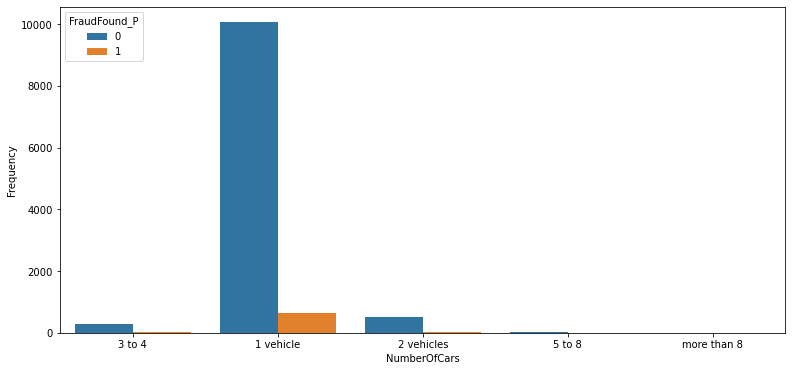

In [111]:
plt.figure(figsize = (13,6))
sns.countplot( x= df['NumberOfCars'], hue = 'FraudFound_P', data = df)
plt.xlabel('NumberOfCars')
plt.ylabel('Frequency')
plt.show()

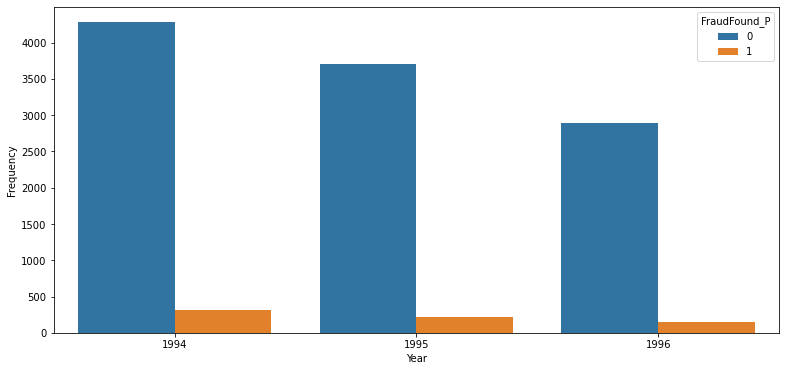

In [112]:
plt.figure(figsize = (13,6))
sns.countplot( x= df['Year'], hue = 'FraudFound_P', data = df)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

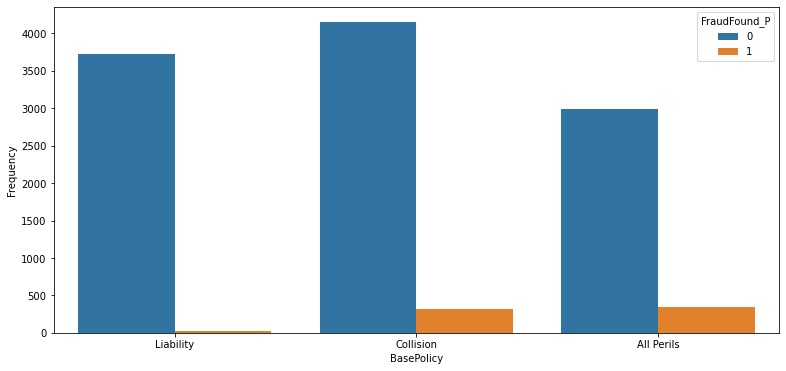

In [113]:
plt.figure(figsize = (13,6))
sns.countplot( x= df['BasePolicy'], hue = 'FraudFound_P', data = df)
plt.xlabel('BasePolicy')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:title={'center':'Age'}, xlabel='FraudFound_P'>

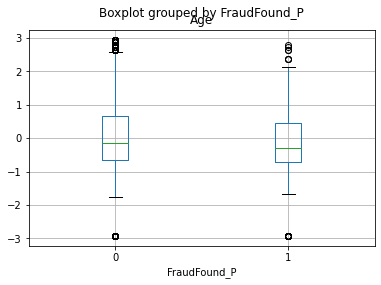

In [118]:
df.boxplot(column='Age',by='FraudFound_P')

<AxesSubplot:title={'center':'ClaimSize'}, xlabel='FraudFound_P'>

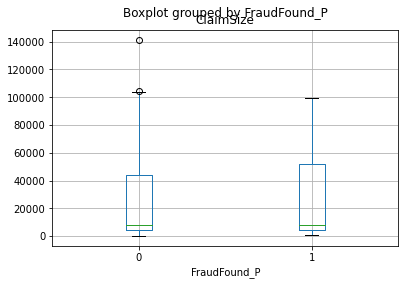

In [114]:
df.boxplot(column='ClaimSize',by='FraudFound_P')

## STANDARDIZED THE NUMERIC VARIABLES

We can see from the BOXPLOTS, the 2 $\textbf{NUMERIC variables}$ $\textbf{"AGE"}$ and $\textbf{"CLAIMSIZE"}$ have $\textbf{OUTLIERS}$. So, we $\textbf{STANDARDIZED}$ these 
$\textbf{2}$ columns for ease of our analysis.

In [219]:
scaler = StandardScaler()
df[["ClaimSize","Age"]]=scaler.fit_transform(df[["ClaimSize","Age"]])
df[["ClaimSize","Age"]]

,ClaimSize,Age
0,1.205969,-1.390577
1,1.345561,-0.434062
2,1.807205,0.522452
3,-0.569928,1.846857
4,2.799520,-0.286906
...,...,...
11560,-0.733746,0.007406
11561,-0.608371,1.331811
11562,-0.653284,-0.360484
11563,-0.568672,-0.434062


## ENCODING THE CATEGORICAL VARIABLES

As Maximum of the $\textbf{FEATURES}$ are $\textbf{CAEGORICAL}$, $\textbf{NON-ORDINAL}$ variable, we have to $\textbf{LABEL}$ 
them. $\\$
But we can’t just label them on the basis of uniqueness, $\\\\$
i.e. suppose a feature has 4 categories, we can’t just label them
as 0,1,2 and 3 because the machine will think that the category that is labelled as 2 must have closer
relationship with the category labelled as 3 instead of the category labelled as 0. This interpretation
done by the machine is totally baseless as in reality that may not even the case. This means that it
doesn’t make sense to order them from largest to smallest using larger or small numbers.$\\\\\\$ 
So, we create $\textbf{DUMMY-VARIABLES}$ for each of the features to avoid this discrepancy. 

In [222]:
df = df[df.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'Urban':1,'Rural':0,'Policy Holder':1,'Third Party':0,'External':1,'Internal':0})
df=pd.get_dummies(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11554 entries, 0 to 11564
Data columns (total 83 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   WeekOfMonth                         11554 non-null  int64  
 1   AccidentArea                        11554 non-null  int64  
 2   WeekOfMonthClaimed                  11554 non-null  int64  
 3   Sex                                 11554 non-null  int64  
 4   Age                                 11554 non-null  float64
 5   Fault                               11554 non-null  int64  
 6   FraudFound_P                        11554 non-null  int64  
 7   Deductible                          11554 non-null  int64  
 8   DriverRating                        11554 non-null  float64
 9   PoliceReportFiled                   11554 non-null  int64  
 10  WitnessPresent                      11554 non-null  int64  
 11  AgentType                           11554

As we know that, we cannot use $\textbf{p}$ $\textbf{DUMMIES}$ for a $\textbf{CATEGORY}$ containing $\textbf{p}$ CLASSES, because in that case,
the $\textbf{DESIGN MATRIX}$ becomes $\textbf{SINGULAR}$; so we $\textbf{CAN'T}$ get the estimators.$\\$ For that we need to $\textbf{DROP}$ $\textbf{1}$
$\textbf{DUMMY}$ for $\textbf{EACH}$ $\textbf{CATEGORY}$ to get a Design Matrix of $\textbf{FULL RANK}$, so that the parameters are $\textbf{ESTIMABLE}$.

In [223]:
df.iloc[:,14:82] = df.iloc[:,14:82].astype(np.int64)
df=df.drop(["MaritalStatus_Widow","PolicyType_Utility - Liability","VehicleCategory_Utility","VehiclePrice_more than 69000","Days_Policy_Accident_none","Days_Policy_Claim_none","PastNumberOfClaims_none","AgeOfVehicle_new","AgeOfPolicyHolder_over 65","NumberOfSuppliments_none","AddressChange_Claim_no change","NumberOfCars_more than 8","BasePolicy_Liability"],axis=1)
df.head()

,WeekOfMonth,AccidentArea,WeekOfMonthClaimed,Sex,Age,Fault,FraudFound_P,Deductible,DriverRating,PoliceReportFiled,...,AddressChange_Claim_1 year,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_under 6 months,NumberOfCars_1 vehicle,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,BasePolicy_All Perils,BasePolicy_Collision
0,5,1,1,0,-1.390577,1,0,300,1.0,0,...,1,0,0,0,0,0,1,0,0,0
1,3,1,4,1,-0.434062,1,0,400,4.0,1,...,0,0,0,0,1,0,0,0,0,1
2,5,1,2,1,0.522452,1,0,400,3.0,0,...,0,0,0,0,1,0,0,0,0,1
3,2,0,1,1,1.846857,0,0,400,2.0,1,...,0,0,0,0,1,0,0,0,0,0
4,1,1,3,1,-0.286906,0,0,400,1.0,0,...,0,0,0,0,1,0,0,0,0,1


## SET TARGET VARIABLE

Our $\textbf{RESPONSE}$ variable is $\textbf{FRAUD FOUND_P}$.

In [225]:
#Select Features
features = df.drop(columns =['FraudFound_P'], axis = 1)
#Select Target 
target = df['FraudFound_P']

## SPLITTING DATASET INTO TRAINING AND TEST DATA

We divide Our dataset in $\textbf{TEST}$ and $\textbf{TRAIN}$ set in $\textbf{(1:4)}$ ratio

In [226]:
# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size =0.2, random_state = 0)

print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (9243, 69)
Shape of testing feature: (2311, 69)
Shape of training label: (9243,)
Shape of training label: (2311,)


## USING DIFFERENT CLASSIFIERS

In [227]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1,
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

## LOGISTIC CLASSIFIER

We firstly apply $\textbf{LOGISTIC CLASSIFIER}$

In [231]:
# Building a model using KNeighborsClassifier
model = sm.GLM(y_train,sm.add_constant(X_train), family = sm.families.Binomial())
result = model.fit()
print (result.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



                 Generalized Linear Model Regression Results                  
Dep. Variable:           FraudFound_P   No. Observations:                 9243
Model:                            GLM   Df Residuals:                     9178
Model Family:                Binomial   Df Model:                           64
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 09 Jul 2022   Deviance:                       54894.
Time:                        23:59:50   Pearson chi2:                 2.68e+18
No. Iterations:                    90   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1014: RuntimeWarning:

divide by zero encountered in log

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1014: RuntimeWarning:

invalid value encountered in multiply



In [232]:
y_pred=result.predict(sm.add_constant(X_test))
y_pred

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



10802    0.0
1241     0.0
11368    0.0
979      0.0
381      0.0
        ... 
4785     0.0
11152    0.0
3415     0.0
7372     0.0
663      0.0
Length: 2311, dtype: float64

In [233]:
y_pred_final=pd.DataFrame({'Target':y_test.values,'Target_Prob':y_pred})
y_pred_final.head()

,Target,Target_Prob
10802,0,0.0
1241,0,0.0
11368,0,0.0
979,0,0.0
381,0,0.0


In [234]:
y_pred_final['predicted']= y_pred_final.Target_Prob.map(lambda x:1 if x >0.5 else 0)
y_pred_final

,Target,Target_Prob,predicted
10802,0,0.0,0
1241,0,0.0,0
11368,0,0.0,0
979,0,0.0,0
381,0,0.0,0
...,...,...,...
4785,0,0.0,0
11152,0,0.0,0
3415,0,0.0,0
7372,0,0.0,0


In [251]:
y_pred_val = y_pred_final["predicted"]
y_pred_val

10802    0
1241     0
11368    0
979      0
381      0
        ..
4785     0
11152    0
3415     0
7372     0
663      0
Name: predicted, Length: 2311, dtype: int64

In [273]:
from sklearn import metrics
# Calculate accuracy, precision, recall, f1-score, and kappa score
acc = metrics.accuracy_score(y_test, y_pred_val)
prec = metrics.precision_score(y_test, y_pred_val)
rec = metrics.recall_score(y_test, y_pred_val)
f1 = metrics.f1_score(y_test, y_pred_val)

# Calculate area under curve (AUC)
y_pred_proba = y_pred_val
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC:",auc)
# Display confussion matrix
cm = metrics.confusion_matrix(y_test, y_pred_val)
print ("Confusion Matrix:\n", cm)
print ("Accuracy:",acc)
print("Precision:",prec)
print ("Recall:",rec)
print ("f1:",f1)
A=cm[0,0]
B=cm[0,0]+cm[1,0]
truepr=A/B
C=cm[1,1]
D=cm[1,1]+cm[0,1]
falsepr=1-(C/D)

AUC: 0.5210080381604015
Confusion Matrix:
 [[2155   24]
 [ 125    7]]
Accuracy: 0.9355257464301169
Precision: 0.22580645161290322
Recall: 0.05303030303030303
f1: 0.08588957055214724


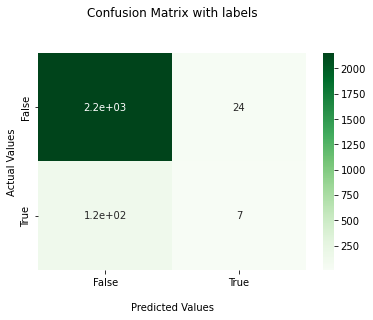

In [238]:
import seaborn as sns

ax = sns.heatmap(cm, annot=True, cmap='Greens')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()  

## DECISION TREE CLASSIFIER

A $\textbf{DECISION TREE}$ is a simple representation for
classifying examples. It is a $\textbf{SUPERVISED MACHINE LEARNING}$ where the data is continuously
split according to a certain parameter.$\\$
$\textbf{ADVANTAGES}$:$\\\\$
• Inexpensive to construct.$\\\\\\$
• Extremely fast at classifying unknown records.$\\\\\\\\$
• Easy to interpret for small-sized trees$\\\\\\\\\\$
• Accuracy comparable to other classification techniques for many simple data sets.$\\\\\\\\\\\\$
• Excludes unimportant features.

$\textbf{DISADVANTAGES}$$\\$
• Easy to over-fit.$\\\\$
• Decision Boundary restricted to being parallel to attribute axes.$\\\\\\$
• Decision tree models are often biased toward splits on features having a large number of
levels.$\\\\\\\\$
• Small changes in the training data can result in large changes to decision logic.$\\\\\\\\\\$
• Large trees can be difficult to interpret and the decisions they make may seem counter
intuitive.

In [239]:
from sklearn import tree

# Building Decision Tree model 
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Evaluate Model
clf_eval = evaluate_model(clf, X_test, y_test)

# Print result
print('Accuracy:', clf_eval['acc'])
print('Precision:', clf_eval['prec'])
print('Recall:', clf_eval['rec'])
print('F1 Score:', clf_eval['f1'])
print('Area Under Curve:', clf_eval['auc'])
print('Confusion Matrix:\n', clf_eval['cm'])

Accuracy: 0.8836001730852445
Precision: 0.14871794871794872
Recall: 0.2196969696969697
F1 Score: 0.17737003058103976
Area Under Curve: 0.5717576174781315
Confusion Matrix:
 [[2013  166]
 [ 103   29]]


After Applying the $\textbf{DECISION CLASSIFIER}$ on our dataset, we get the following result:

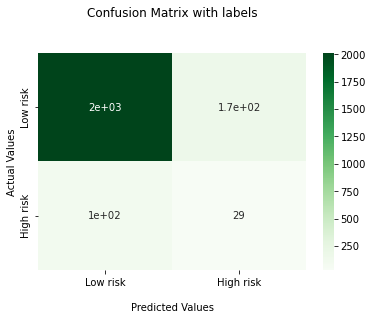

In [240]:
import seaborn as sns

ax = sns.heatmap(clf_eval['cm'], annot=True, cmap='Greens')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Low risk','High risk'])
ax.yaxis.set_ticklabels(['Low risk','High risk'])

## Display the visualization of the Confusion Matrix.
plt.show() 

## RANDOM FOREST CLASSIFIER

It is an $\textbf{ENSEMBLE TREE-BASED lEARNING ALGORITHM}$.$\\$ 
The $\textbf{RANDOM FOREST CLASSIFIER}$ is a set of $\textbf{DECISION-TREE}$ from $\textbf{RANDOMLY}$ selected $\textbf{SUBSET}$ of
training set. It aggregates the votes from different decision trees to decide the final class of
the test object.$\\\\$
This classifier also use $\textbf{“MAJORITY VOTING RULE”}$ to assign a feature vector to a
particular class.$\\\\\\$
$\textbf{ADVANTAGES}$:$\\\\\\\\$
• It is one of the most accurate learning algorithms available. For many data sets, it produces
a highly accurate classifier.$\\\\\\\\\\$
• It runs efficiently on large databases.$\\\\\\\\\\\\$
• It can handle thousands of input variables without variable deletion.$\\\\\\\\\\\\\\$
• It gives estimates of what variables that are important in the classification.$\\\\\\\\\\\\\\\\$
• It generates an internal unbiased estimate of the generalization error as the forest building
progresses.$\\\\\\\\\\\\\\\\\\$
• It has an effective method for estimating missing data and maintains accuracy when a large
proportion of the data are missing.$\\\\\\\\\\\\\\\\\\\\$

$\textbf{DISADVANTAGES}$$\\$
• Random forests have been observed to overfit for some datasets with noisy
classification/regression tasks.$\\\\$
• For data including categorical variables with different number of levels, random forests are
biased in favour of those attributes with more levels. Therefore, the variable importance
scores from random forest are not reliable for this type of data.

In [272]:
from sklearn.ensemble import RandomForestClassifier
  
# Creating a Random Forest Model 
rf = RandomForestClassifier(n_jobs=2,random_state=0)
rf.fit(X_train, y_train)

# Evaluate Model
rf_eval = evaluate_model(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.9437472955430549
Precision: 0.625
Recall: 0.03787878787878788
F1 Score: 0.07142857142857144
Area Under Curve: 0.7839049049466673
Confusion Matrix:
 [[2176    3]
 [ 127    5]]


After Applying the $\textbf{RANDOM FOREST}$ classifier on our dataset, we get the following result:

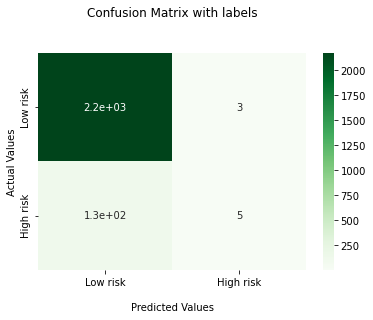

In [244]:
import seaborn as sns

ax = sns.heatmap(rf_eval['cm'], annot=True, cmap='Greens')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Low risk','High risk'])
ax.yaxis.set_ticklabels(['Low risk','High risk'])

## Display the visualization of the Confusion Matrix.
plt.show() 

## LINEAR DISCRIMINANT CLASSIFIER

$\textbf{LINEAR DISCRIMINANT ANALYSIS}$ is a
$\textbf{DIMENTIONALITY REDUCTION TECHNIQUE}$ that is commonly used for $\textbf{SUPERVISED CLASSIFICATION}$
problems. $\\$
It is used for modelling differences in groups i.e. $\textbf{SEPERATING}$ $\textbf{2}$ or $\textbf{MORE}$ $\textbf{CLASSES}$.$\\\\$
It is used to project the features in higher dimension space into a lower dimension space.$\\\\\\$
For example, we have two classes and we need to separate them efficiently. Classes can
have multiple features. Using only a single feature to classify them may result in some
overlapping as shown in the below figure. So, we will keep on increasing the number of
features for proper classification.$\\\\\\\\$
Two criteria are used by $\textbf{LDA}$$\\\\\\\\\\$:
i) Maximize the distance between means of the two classes.$\\\\\\\\\\\\$
ii) Minimize the variation within each class.$\\\\\\\\\\\\\\$
$\textbf{ADVANTAGES:}$$\\\\\\\\\\\\\\\\$
i) It is simple, fast and portable algorithm.

$\textbf{DISADVANTAGES}$$\\$
i) It requires normal distribution assumption on features/predictors.$\\\\$
ii) Sometimes not good for few categories variables.$\\\\\\$

In [253]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
  
# Creating a Linear Discriminat Classifier 
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train, y_train)


# Evaluate Model
lda_eval = evaluate_model(lda, X_test, y_test)

# Print result
print('Accuracy:', lda_eval['acc'])
print('Precision:', lda_eval['prec'])
print('Recall:', lda_eval['rec'])
print('F1 Score:', lda_eval['f1'])
print('Area Under Curve:', lda_eval['auc'])
print('Confusion Matrix:\n', lda_eval['cm'])

Accuracy: 0.9402855906533968
Precision: 0.25
Recall: 0.022727272727272728
F1 Score: 0.04166666666666667
Area Under Curve: 0.7721814287899649
Confusion Matrix:
 [[2170    9]
 [ 129    3]]


After Applying the $\textbf{LINEAR DISCRIMINANT}$ classifier on our dataset, we get the following result

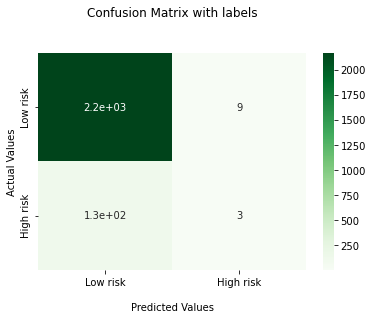

In [254]:
import seaborn as sns

ax = sns.heatmap(lda_eval['cm'], annot=True, cmap='Greens')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Low risk','High risk'])
ax.yaxis.set_ticklabels(['Low risk','High risk'])

## Display the visualization of the Confusion Matrix.
plt.show() 

## COMPARE ACCURACIES, AUC, RECALL AND F1 VALUES

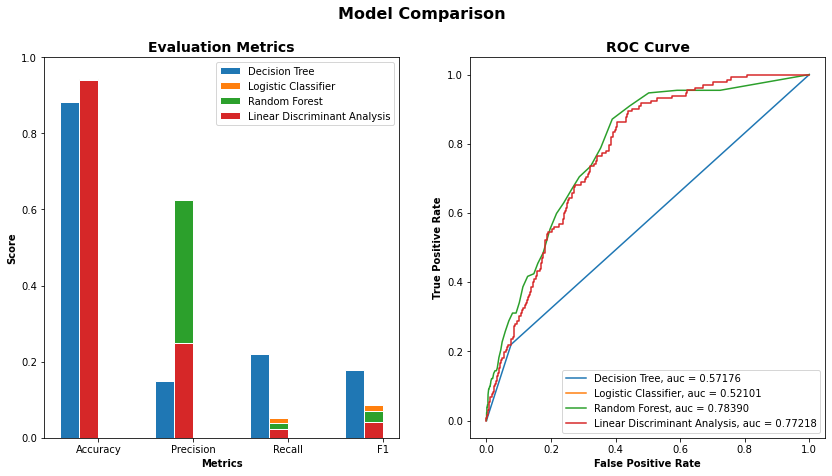

In [271]:
# Intitialize figure with 4 plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
clf_score = [clf_eval['acc'], clf_eval['prec'], clf_eval['rec'], clf_eval['f1']]
lg_score = [metrics.accuracy_score(y_test, y_pred_val), metrics.precision_score(y_test, y_pred_val), metrics.recall_score(y_test, y_pred_val), metrics.f1_score(y_test, y_pred_val)]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1']]
lda_score = [lda_eval['acc'], lda_eval['prec'], lda_eval['rec'], lda_eval['f1']]
## Set position of bar on X axis
r1 = np.arange(len(clf_score))
r2 = [x + barWidth for x in r1]


## Make the plot
ax1.bar(r1, clf_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, knn_score, width=barWidth, edgecolor='white', label='Logistic Classifier')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r2, lda_score, width=barWidth, edgecolor='white', label='Linear Discriminant Analysis')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(clf_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
# Comparing ROC Curve
ax2.plot(clf_eval['fpr'], clf_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(clf_eval['auc']))
ax2.plot(falsepr, truepr, label='Logistic Classifier, auc = {:0.5f}'.format(metrics.roc_auc_score(y_test, y_pred_proba)))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(lda_eval['fpr'], lda_eval['tpr'], label='Linear Discriminant Analysis, auc = {:0.5f}'.format(lda_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')


## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

# CONCLUSION

After apply the classification methods i.e. $\textbf{LOGISTIC}$, $\textbf{DECISION TREE}$, $\textbf{RANDOM FOREST}$ AND
$\textbf{LINEAR DISCRIMNINANT CLASSIFIER}$ on the train data, we found that in terms of
$\textbf{ACCURACY}$, $\textbf{RANDOM FOREST}$ is the $\textbf{BEST}$ classifier for detection Insurance Claim Fraud with
$\textbf{94.37}$% Accuracy.$\\$
 And in terms of $\textbf{PRECISION}$, also $\textbf{RANDOM FOREST}$ is the $\textbf{BEST}$ classifier for detection
Insurance Claim Fraud with $\textbf{62.5}$% Precision with respect to other 3 classifiers.$\\\\$
 And from the above graph, using the RANDOM FOREST Classifier, we can see
$\textbf{AUC}$ score is $\textbf{0.7839}$. $\\\\\\$
So, for our dataset and for our objective of detection in Insurance Claim
Fraud, $\textbf{RANDOM FOREST}$ is the Best Classifier. So, we conclude the project here.